In [1]:
##importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
##loading my dataset

df=pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#checking data types for the columns

df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [5]:
#checking for null values
df.isnull().sum()


Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
#checking dublicated rows


df.duplicated().sum()

0

In [7]:
#lets do some data preprocessing to clean the data structure of the dataset
#dropping unwanted column

df.drop("Unnamed: 0",axis=1,inplace=True)


In [8]:
#changing data structure and extracting valuable info. for Ram and Weight
df['Ram']=df['Ram'].str.replace('GB','')

In [9]:
df['Ram']=df['Ram'].astype('int')

In [10]:
df['Weight']=df['Weight'].str.replace('kg','')

In [11]:
df['Weight']=df['Weight'].astype('float')

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<AxesSubplot:xlabel='Price', ylabel='Density'>

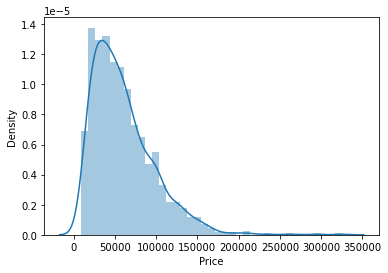

In [13]:
#now lets do some Univariate analysis

sns.distplot(df['Price'])

<AxesSubplot:>

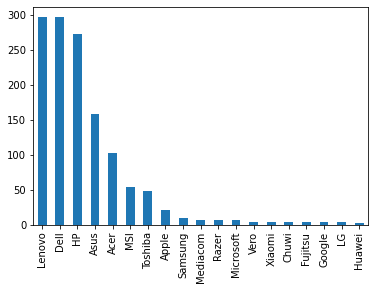

In [14]:

df['Company'].value_counts().plot(kind='bar')

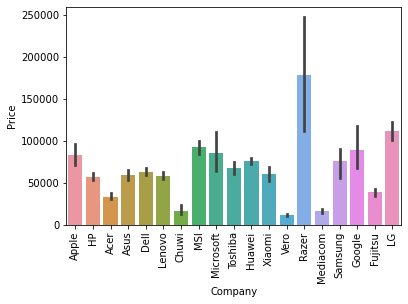

In [15]:
## We can see that most of the laptops are from brand DELL,LENEVO,HP,ASUS,ACER,MSI 

#NOW LETS DO SOME BI-VARIATE ANALYSIS TO CHECK THE different features OF THE LAPTOPS COMPANY WISE

sns.barplot(x='Company',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()


<AxesSubplot:>

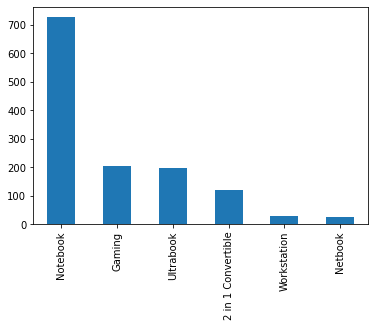

In [16]:
#we can see that razer brand has the highest price of laptops among other laptops.

df['TypeName'].value_counts().plot(kind='bar')

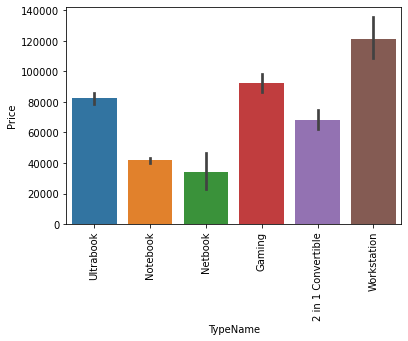

In [17]:
# notebook is the maximum type of laptops among all types

sns.barplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

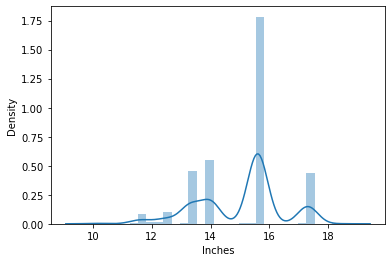

In [18]:
# Workstation and Gaming laptops are the most costly laptops type-wise

sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

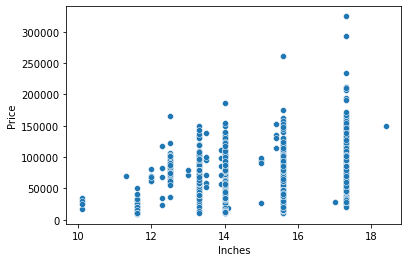

In [19]:
# most of the laptops are of 14-16 inches of size

sns.scatterplot(x='Inches',y='Price',data=df)

In [20]:
# there is a little +ve co-relation between price and the  laptop size.

#now lets check the unique screen resolution of the laptops.

df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [21]:
# from the above information we will do some feature engineering to extract valuable information out of it.

#Applying lambda function to extract information that laptop is touchscreen or not.

df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

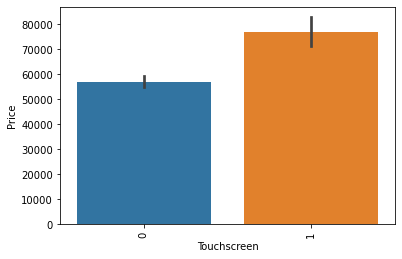

In [23]:
sns.barplot(x='Touchscreen',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
# touchscreen laptops have a higher price as compared to non touchscreen laptops.

#now lets extract the x-res and y-res from that column.


res=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [25]:
df['x_res']=res[0]
df['y_res']=res[1]

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,IPS Panel Retina Display 2560,1600


In [27]:
df['x_res']=df['x_res'].str.replace(",",'').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [29]:
# here we first use str.split method to split screen resolution into 2 parts based on 'x',stored it into dataframe.
#after that we used some regular expression to extract only the x-res data from that column

df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Touchscreen           int64
x_res                object
y_res                object
dtype: object

In [30]:
# changed the data type from object to integer

df['x_res']=df['x_res'].astype('int32')
df['y_res']=df['y_res'].astype('int32')

In [31]:
# lets check the corelation of the columns with respect to price

df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [32]:
## now lets extract the ppi(pixels per inches) info from x_res,y_res and  inches

df['ppi']=(((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [34]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [35]:
# we can see that ppi has a high corelation with respect to price
# now lets drop the screen resolution column as we have extracted the valuable info out of it.

df.drop('ScreenResolution',inplace=True,axis=1)


In [36]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [37]:
## now we drop x_res,y_rex and inches also becauuse we have ppi for it

df.drop(columns=['x_res','y_res','Inches'],inplace=True)


In [38]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005


In [39]:
# now lets do some feature engineering on the cpu column

df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
AMD E-Series 9000e 1.5GHz                 1
Intel Core i5 7200U 2.50GHz               1
Intel Core i7 7700HQ 2.7GHz               1
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core i7 2.9GHz                      1
Name: Cpu, Length: 118, dtype: int64

In [40]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]) )

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5


In [42]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text =='Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel processors'
        else:
            return 'Amd Processors'

In [43]:
df['Cpu_brand']=df['Cpu_name'].apply(fetch_processor)

<AxesSubplot:>

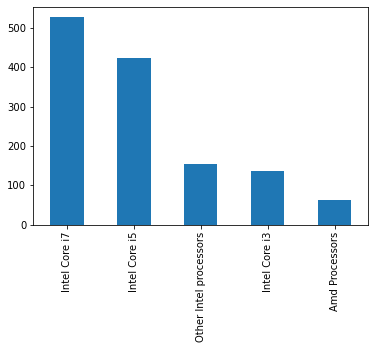

In [44]:
##We first split the Cpu column and extacted first 3 sentences out of it
##we created a function 'fetch processor' where in we categorized the total cpu values into Intel core i3,i5,i7,amd and other processors


df['Cpu_brand'].value_counts().plot(kind='bar')

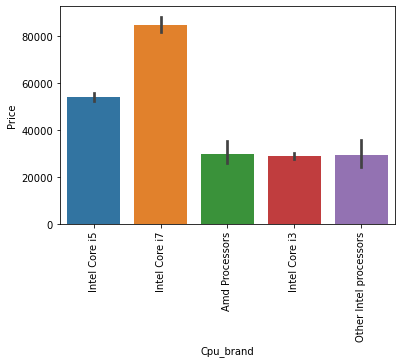

In [45]:
#we can see that maximum laptops are  of i7 processors
#i7 processor has the highest price among other processors 

sns.barplot(x='Cpu_brand',y='Price',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,Intel Core i5


In [47]:
##now lets drop unwanted columns

df.drop(columns=['Cpu','Cpu_name'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5


In [49]:
#maximum laptops are of 8gb ram.

df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

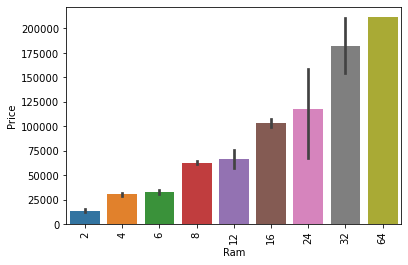

In [50]:
# as the ram increases price also increases. it has a high corelation with price.

sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5


In [52]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
256GB SSD +  1.0TB Hybrid          1
5

In [53]:

##applied lambda function and regular expression to extract type of storage from the memory column.


df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [54]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,0,0


In [55]:
df['Hybrid'].value_counts()

0       1291
1000      11
508        1
Name: Hybrid, dtype: int64

In [56]:
df['Flash_Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [57]:
##SINCE THEY DONT CONTRIBUTE TO MUCH IN THE ANALYSIS PROCESS WE WILL DROP THESE COLUMN

df.drop(columns=['Flash_Storage','Hybrid'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,0,256


In [59]:
df['Gpu'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia GeForce GTX 940M       1
Nvidia GeForce GTX 1070M      1
Nvidia GeForce GTX 980        1
Nvidia GeForce 940M           1
Intel Graphics 620            1
Name: Gpu, Length: 110, dtype: int64

In [60]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [61]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [62]:
#lets remove the arm gpu

df=df[df['Gpu_brand']!='ARM']

<AxesSubplot:>

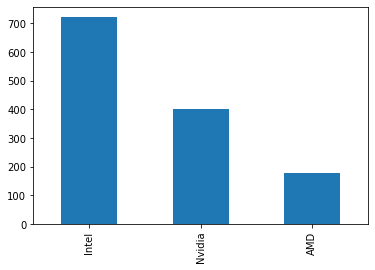

In [63]:
df['Gpu_brand'].value_counts().plot(kind='bar')

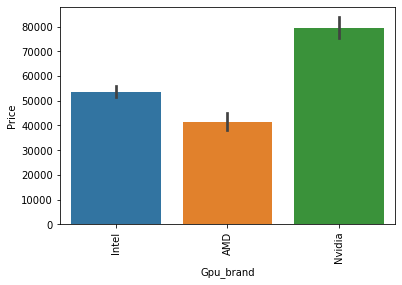

In [64]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
## nvidia has the highest price of 80000 then comes intel and then amd

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel


In [66]:
df.drop(columns=['Gpu','Memory'],inplace=True)

In [67]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [68]:
## since there are too may categories, lets categorize them into main operating systems.

def cat_OS(text):
    if text == 'Windows 10' or text=='Windows 7'or text=='Windows 10 S':
        return 'Windows'
    else:
        if text=='macOS' or text=='Mac OS X':
            return 'MacOS'
        else:
            return 'Other Os/Linux'

In [69]:
df['Operating System']=df['OpSys'].apply(cat_OS)

In [70]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating System
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Other Os/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel,MacOS


In [71]:
df['Operating System'].value_counts()

Windows           1125
Other Os/Linux     156
MacOS               21
Name: Operating System, dtype: int64

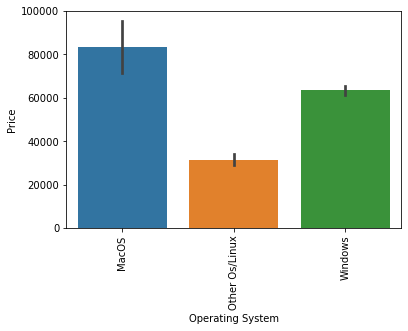

In [72]:
sns.barplot(x=df['Operating System'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [73]:
##m MacOs has the highest price as compared to other operating systems

df.drop('OpSys',inplace=True,axis=1)

In [74]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Other Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel,MacOS


<AxesSubplot:xlabel='Weight', ylabel='Density'>

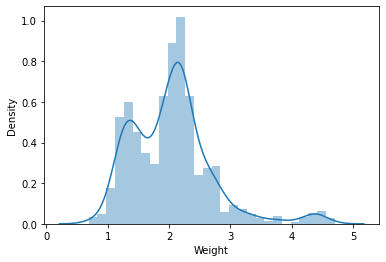

In [75]:
## now lets check the weight column

sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

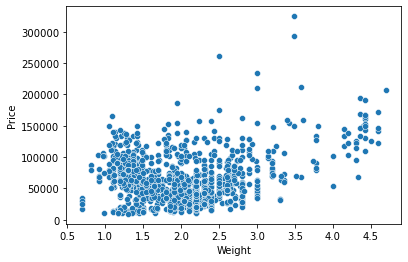

In [76]:
sns.scatterplot(x='Weight',y='Price',data=df)

In [77]:
## as the weight increases there is a  very little increase in the price.

df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [78]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating System
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Other Os/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel,MacOS


<AxesSubplot:>

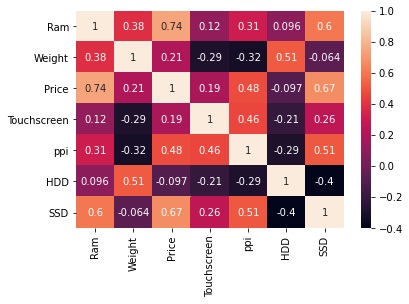

In [79]:
## here we can see that ram,ppi,ssd has the highest corelation with the price.
##Lets check it with the heatmap.

sns.heatmap(df.corr(),annot=True)

In [80]:
## now lets encode our categorical features into numerical feature by the help of Label Encoder

from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()
list=['Company','TypeName','Cpu_brand','Gpu_brand','Operating System']
for val in list:
    df[val]=le.fit_transform(df[val])

In [82]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating System
0,1,4,8,1.37,71378.6832,0,226.983005,2,0,128,1,0
1,1,4,8,1.34,47895.5232,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,30636.0000,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,135195.3360,0,220.534624,3,0,512,0,0
4,1,4,8,1.37,96095.8080,0,226.983005,2,0,256,1,0


<AxesSubplot:xlabel='Price', ylabel='Density'>

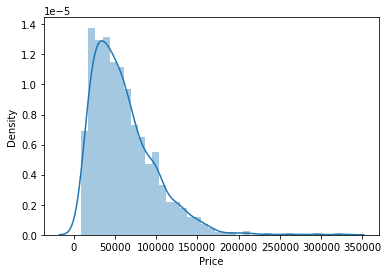

In [83]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

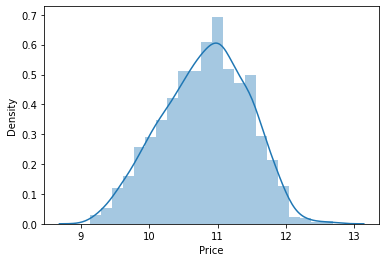

In [84]:
##its skewed, lets use log transformation to remove its skewnwss

sns.distplot(np.log(df['Price']))

In [85]:
##now lets extract my independent and dependant feature into x and y

x=df.drop('Price',axis=1)
y=np.log(df['Price'])

In [86]:
x

,Company,TypeName,Ram,Weight,Touchscreen,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating System
0,1,4,8,1.37,0,226.983005,2,0,128,1,0
1,1,4,8,1.34,0,127.677940,2,0,0,1,0
2,7,3,8,1.86,0,141.211998,2,0,256,1,1
3,1,4,16,1.83,0,220.534624,3,0,512,0,0
4,1,4,8,1.37,0,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,4,1.80,1,157.350512,3,0,128,1,2
1299,10,0,16,1.30,1,276.053530,3,0,512,1,2
1300,10,3,2,1.50,0,111.935204,4,0,0,1,2
1301,7,3,6,2.19,0,100.454670,3,1000,0,0,2


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [88]:
## now lets use train test split to train our data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [92]:
## now lets import and impliment several regression ml models and check our r2_score and mae.


from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


Implementing various Regression Models

Linear Regression

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.6199416621985545
MAE 0.2961632073698317


DecisionTreeRegressor

In [97]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
y_pred=dtr.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.7573859577096381
MAE 0.21511390420780105


Lasso & Ridge Regression

In [98]:
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
y_pred=lasso.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.4800300329883612
MAE 0.3449014238333445


In [99]:
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
y_pred=ridge.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.6198935576205435
MAE 0.2961655467258425


Support Vector Regressor

In [100]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
y_pred=svr.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.5867256841288164
MAE 0.2947220172629723


Now lets Implement Ensemble models.

Random Forest Regressor


In [101]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred=rf.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.8659448211981082
MAE 0.16976550198028617


Ada boost Regressor

In [102]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
y_pred=ad.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.795846080948538
MAE 0.22171768951785165


Extra Trees Regressor

In [103]:
xtr=ExtraTreesRegressor()
xtr.fit(x_train,y_train)
xtr.score(x_train,y_train)
y_pred=xtr.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

r2_score 0.8580601170500325
MAE 0.16866734902462432


As we can see that RandomForestRegressor is giving the best score 86% so lets go with that.

Now lets optimize the hyperparameters using Randomsearchcv.

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [106]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [107]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [108]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,n_iter=10,param_distributions=random_grid,n_jobs=10,verbose=2)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=10,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [110]:
print(rf_random.best_params_)

{'n_estimators': 1100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [111]:
pred=rf_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

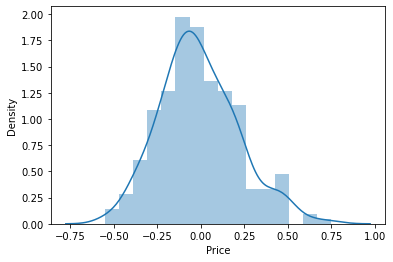

In [112]:
sns.distplot(y_test-pred)

In [113]:
import pickle
filename="Laptop_pred.pkl"
pickle.dump(rf,open(filename,"wb"))